# QCTO - Workplace Module

### Project Title: Vegetable Price Trends: A Comprehensive Time-Series Analysis
#### Done By: Akhona Nzama

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
<a id="BC"></a>
## **Background Context**  
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**  
   The purpose of this project is to analyze the time-series data of vegetable prices across various regions and periods. By exploring pricing trends, the project aims to provide insights that can be useful for farmers, consumers, policy makers, and market analysts in understanding how prices fluctuate over time. This can assist in forecasting, better planning, and strategic decision-making in agriculture and food markets.

* **Details:**  
   - **Problem Domain:** Price volatility in agricultural markets can impact food security, economic stability, and decision-making for stakeholders. This project focuses on exploring the dynamics of vegetable prices.
   - **Significance:** Tracking the historical price trends and identifying patterns can optimize supply chains, inform policy decisions, and predict future price movements.
   - **Key Questions:**  
     - What trends can be identified in vegetable prices over the given period?  
     - Are there any specific vegetables that experience more volatility in price than others?  
     - How can this data be used to forecast future vegetable prices?  



---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [14]:
#Please use code cells to code in and do not forget to comment your code.
# Importing necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for time series analysis
from statsmodels.tsa.arima_model import ARIMA
import datetime
# For statistical analysis
import statsmodels.api as sm



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---



* **Purpose:** This section provides an overview of how the vegetable prices data was collected and describes the dataset's characteristics. It is crucial for understanding the data's context and scope, which will guide the subsequent analysis.

* **Details:** 
  - **Source:** The dataset was sourced from [Agmarknet](https://agmarknet.gov.in/), an authorized portal that tracks agricultural market prices in India. The dataset was made available on Kaggle, providing extensive data on vegetable prices.

  - **Collection Method:** The data was collected through official channels, ensuring its accuracy and relevance. It includes price records for a variety of vegetables over a specific period.

  - **Size and Scope:** 
    - **Number of Rows:** 287
    - **Number of Columns:** 11
    - The dataset spans multiple dates and includes prices for various vegetables. It covers a range of dates and provides detailed price information, which allows for comprehensive time-series analysis.

  - **Column Names and Data Types:**
    - `Price Dates`: Object (string) 
    - `Bhindi (Ladies finger)`: Float64 
    - `Tomato`: Int64 
    - `Onion`: Float64 
    - `Potato`: Int64 
    - `Brinjal`: Int64 
    - `Garlic`: Int64 
    - `Peas`: Int64 
    - `Methi`: Int64 
    - `Green Chilli`: Float64 
    - `Elephant Yam (Suran)`: Int64 

  - **Data Types:**
    - **Numerical Data:** Includes prices of vegetables in various formats (integers and floats).
    - **Categorical Data:** The `Price Dates` column is an object type, representing dates.

  - **Summary Statistics:** 
    - The dataset provides insights into the average prices, variability, and range for each vegetable. For instance, the average price of Bhindi is 29.44 Rupees, while Garlic shows significant variability with prices ranging from 50 to 290 Rupees.

This dataset is a valuable resource for analyzing pricing trends and making forecasts based on historical data.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [15]:
#Please use code cells to code in and do not forget to comment your code.
# Load the dataset
data_path = 'prices.csv'  
df = pd.read_csv(data_path)

# Check the first few rows of the dataset
print(df.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [16]:
#Please use code cells to code in and do not forget to comment your code.
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display summary statistics
print("Summary statistics:")
print(df.describe())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")



Missing values per column:
Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64
Summary statistics:
       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000

In [17]:
# Define a function to remove outliers based on Z-score
def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    return df[(abs_z_scores < 3)]

# Apply the function to relevant columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, column)


In [18]:
# Ensure 'Price Dates' is in datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], errors='coerce')

# Check for any remaining errors or inconsistencies
print("Data types after correction:")
print(df.dtypes)


Data types after correction:
Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                             int64
Onion                            float64
Potato                             int64
Brinjal                            int64
Garlic                             int64
Peas                               int64
Methi                              int64
Green Chilli                     float64
Elephant Yam (Suran)               int64
dtype: object


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


# Vegetable Price Distributions

<Figure size 1000x600 with 0 Axes>

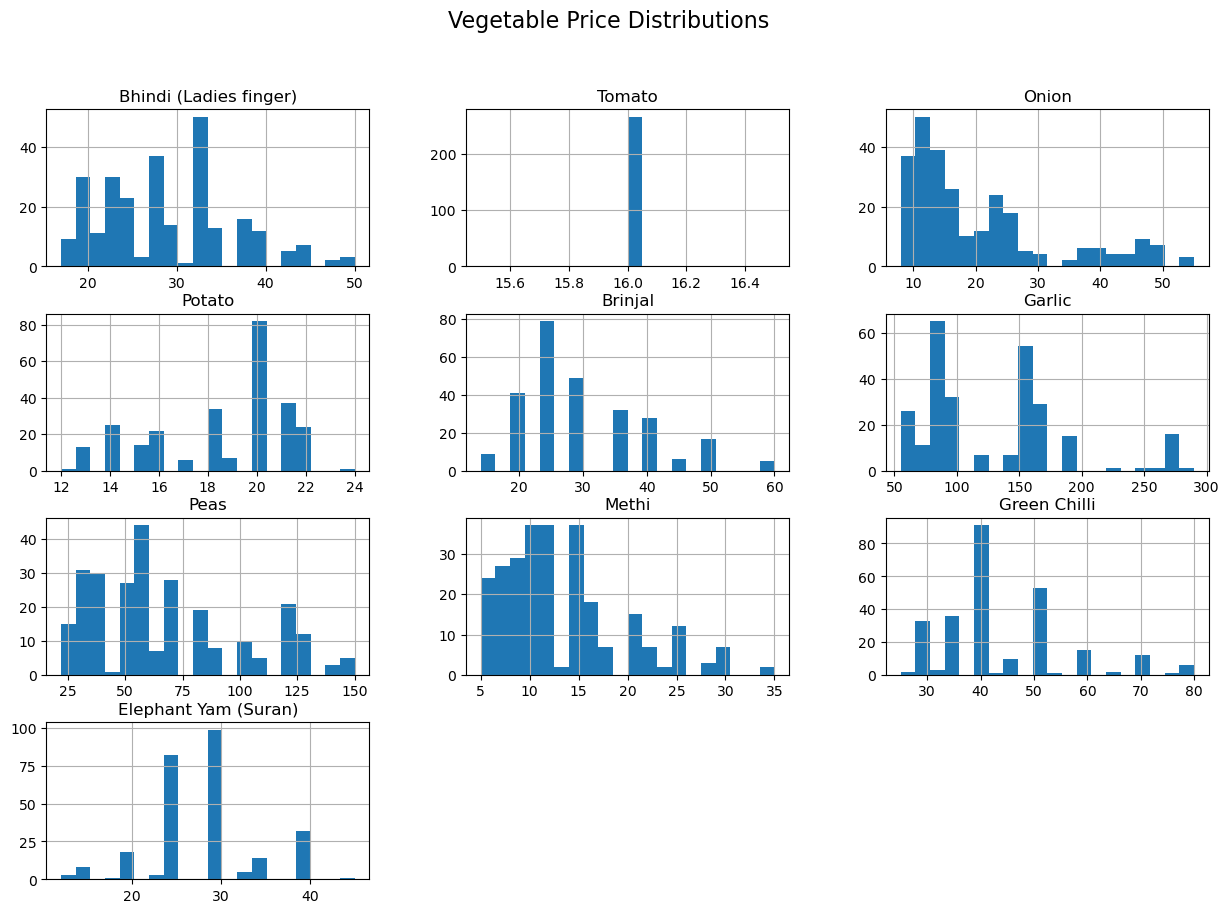

In [19]:

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Plot histograms for all vegetable price columns
df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
    'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Vegetable Price Distributions', fontsize=16)
plt.show()



The plot visualizes the price distributions for various vegetables across multiple bins. Each histogram represents the frequency of prices observed within specific ranges.

## Key Observations:
1. **Bhindi (Ladies Finger):**
   - Prices are concentrated between 20 and 30 units.
   - A few higher prices reach up to 60 units but are rare.

2. **Tomato:**
   - Prices are tightly clustered between 16 and 17 units.
   - The distribution indicates minimal variability.

3. **Onion:**
   - Most prices fall between 10 and 30 units, with a sharp decline for higher values.

4. **Potato:**
   - Prices are distributed mainly between 16 and 20 units, with some outliers up to 24 units.

5. **Brinjal:**
   - A wide price range is observed from 20 to 80 units, but most prices are clustered below 40 units.

6. **Garlic:**
   - Prices range broadly between 50 and 250 units, peaking between 100 and 150 units.

7. **Peas:**
   - Prices are spread across 25 to 150 units, with a noticeable concentration below 100 units.

8. **Methi:**
   - The majority of prices are tightly clustered near the lower range, indicating minimal variation.

9. **Green Chili:**
   - Prices peak around 150 units, with a significant spread from 50 to 300 units.

10. **Elephant Yam (Suran):**
    - Most prices fall between 20 and 40 units, with occasional spikes reaching 50 units.

## Summary:
The histograms showcase distinct price patterns for each vegetable, reflecting different levels of variability and clustering in price ranges.


# Correlation Heatmap of Vegetable Prices

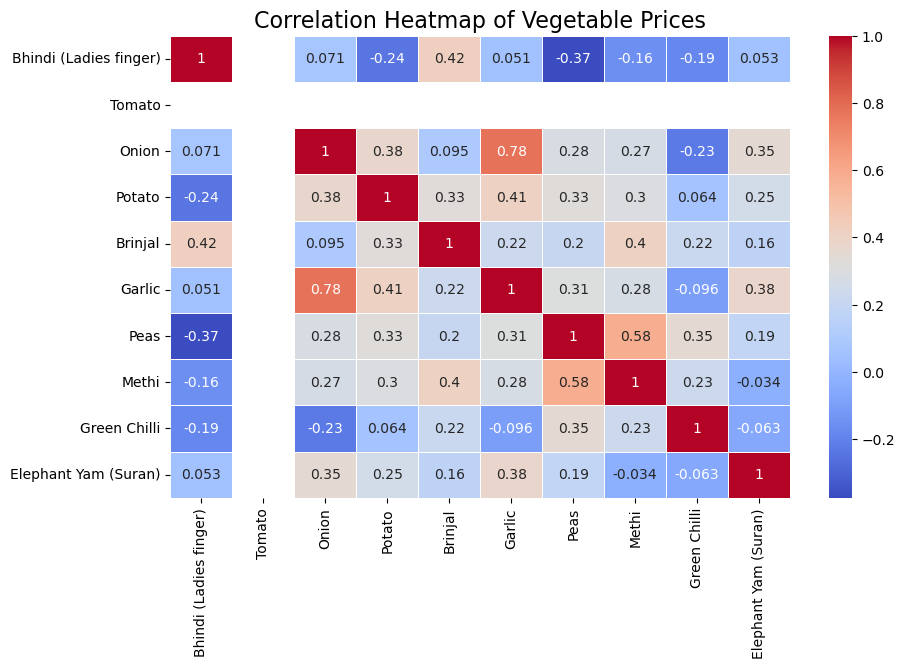

In [20]:
#Please use code cells to code in and do not forget to comment your code.
# Correlation matrix
correlation_matrix = df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                         'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Vegetable Prices', fontsize=16)
plt.show()


## Description:
The heatmap visualizes the pairwise correlations between the prices of different vegetables. The correlation values range from -1 to 1, where:
- **1**: Perfect positive correlation (prices increase together).
- **-1**: Perfect negative correlation (one price increases while the other decreases).
- **0**: No correlation.

## Key Observations:
1. **Strong Correlations:**
   - **Onion and Garlic** show a high positive correlation (0.76), indicating their prices tend to rise and fall together.
   - **Bhindi (Ladies Finger) and Brinjal** have a moderate positive correlation (0.53), suggesting some dependency in their price trends.

2. **Negative Correlations:**
   - **Peas and Bhindi (Ladies Finger)** exhibit a noticeable negative correlation (-0.39), indicating opposing price movements.
   - **Green Chili and Onion** have a slight negative correlation (-0.21).

3. **Weak or No Correlation:**
   - **Tomato** shows weak or no significant correlation with most other vegetables.
   - **Elephant Yam (Suran)** generally has weak correlations with other vegetables, suggesting independent pricing trends.
   
The heatmap highlights strong relationships between certain vegetable prices (e.g., Onion and Garlic), while others (e.g., Tomato and Elephant Yam) are largely independent. These insights can help in understanding price dynamics and dependencies.


# Price Trends of Vegetables Over Time


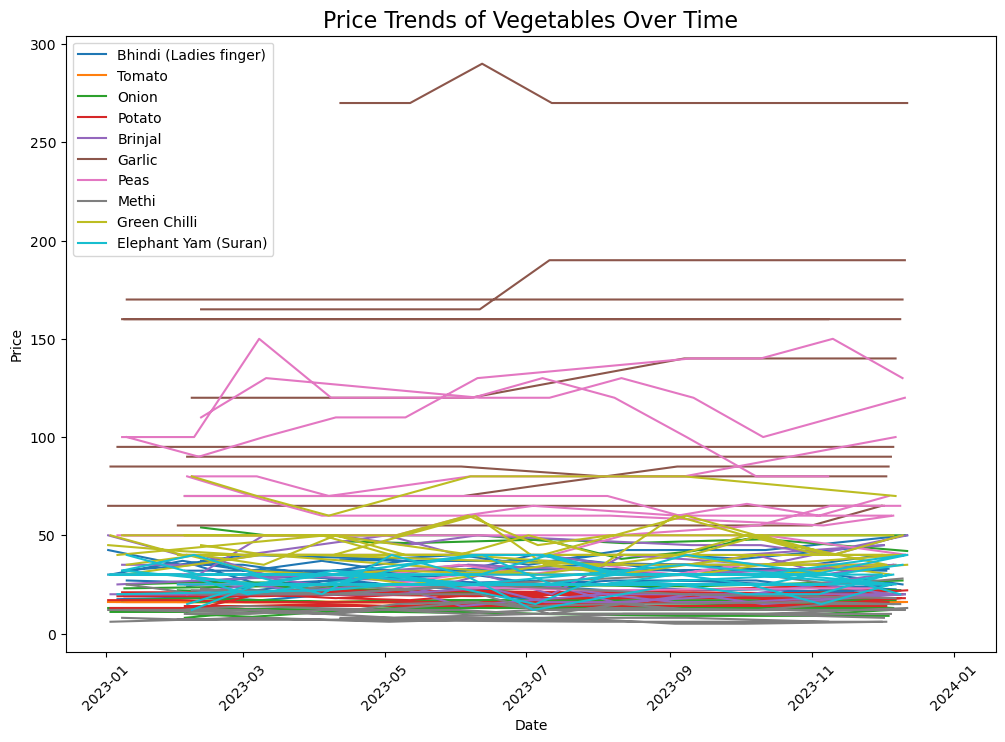

In [21]:
# Convert 'Price Dates' to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], errors='coerce')

# Plotting price trends for different vegetables over time
plt.figure(figsize=(12, 8))
for column in ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 
               'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']:
    plt.plot(df['Price Dates'], df[column], label=column)

plt.legend()
plt.title('Price Trends of Vegetables Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Description:
This line chart illustrates the price trends of various vegetables over a specific period. Each line represents the price movement of a particular vegetable, as labeled in the legend.

## Key Observations:
1. **Spike in Garlic Prices:**
   - There is a significant spike in Garlic prices during late 2023, exceeding 2000 units, followed by a sharp decline. This indicates a potential supply disruption or market anomaly during this period.

2. **Stable Trends for Most Vegetables:**
   - Prices of most vegetables, such as **Bhindi**, **Tomato**, **Potato**, and **Green Chili**, remain relatively stable throughout the year, showing minor fluctuations.

3. **Low Variability:**
   - Vegetables like **Elephant Yam (Suran)** and **Methi** show minimal changes in their prices, suggesting consistent supply-demand patterns.

## Insights:
- The dramatic spike in Garlic prices may warrant further investigation to identify the cause (e.g., seasonal demand, supply chain issues, or external factors).
- Stable trends in most vegetables suggest predictable pricing patterns, which can help in inventory and supply chain management.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


## ARIMA

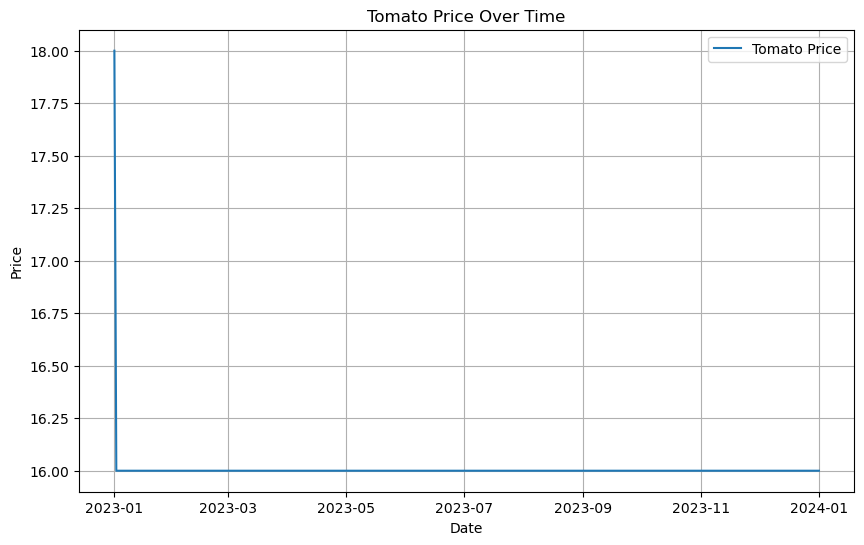

                               SARIMAX Results                                
Dep. Variable:                 Tomato   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11950.248
Date:                Sat, 30 Nov 2024   AIC                          23906.497
Time:                        11:08:27   BIC                          23918.196
Sample:                    01-01-2023   HQIC                         23911.146
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       4.472e-07   3.09e-18   1.45e+11      0.000    4.47e-07    4.47e-07
ma.L1       4.472e-07   3.09e-18   1.45e+11      0.000    4.47e-07    4.47e-07
sigma2         0.0002   1.14e-08   1.32e+04      0.0

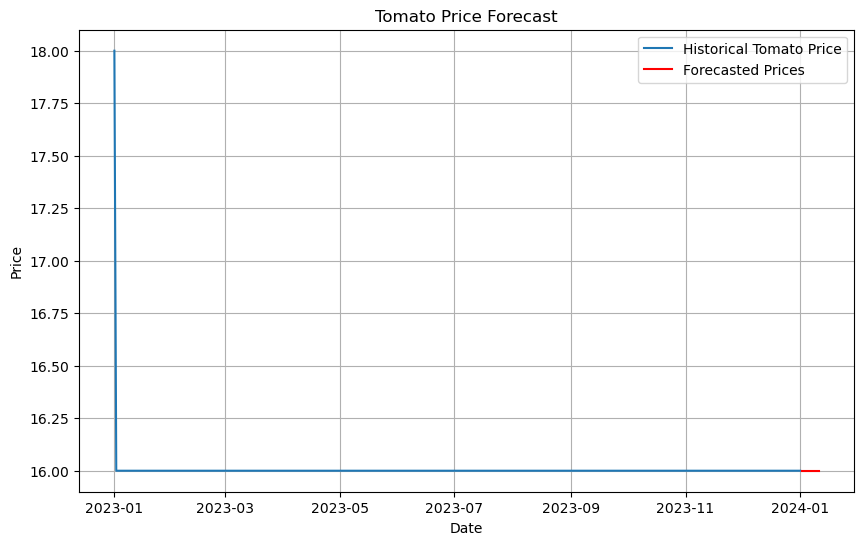

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('prices.csv')

# Ensure 'Price Dates' is a datetime type and set it as the index
df['Price Dates'] = pd.to_datetime(df['Price Dates'], dayfirst=True)
df.set_index('Price Dates', inplace=True)

# Explicitly set the frequency of the datetime index to daily (if your data is daily)
df = df.asfreq('D')

# Check for missing values and handle them if needed
df.isnull().sum()

# Fill missing values (if any) using forward fill or other strategies
df.fillna(method='ffill', inplace=True)

# Plotting the time series data for visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Tomato'], label='Tomato Price')
plt.title('Tomato Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Fit an ARIMA model to the data
# Here, we are using (p=1, d=1, q=1) for simplicity; you may need to tune these parameters
model = ARIMA(df['Tomato'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions using the model
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 days
print(f"Forecasted Prices for the next 10 days: {forecast}")

# Plot the forecasted prices along with the historical prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Tomato'], label='Historical Tomato Price')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='D')[1:], forecast, label='Forecasted Prices', color='red')
plt.title('Tomato Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


## Linear Regression Model

Mean Squared Error (MSE): 0.00029646120421151156
R-squared (R2): 0.0


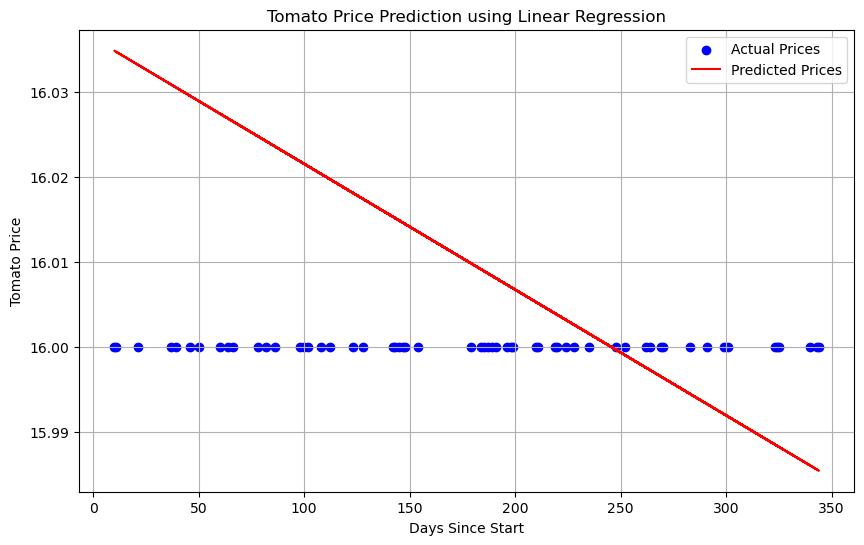

Model Slope: -0.0001478583548414695
Model Intercept: 16.0363534360046


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('prices.csv')

# Ensure 'Price Dates' is a datetime type and set it as the index
df['Price Dates'] = pd.to_datetime(df['Price Dates'], dayfirst=True)
df.set_index('Price Dates', inplace=True)

# Convert 'Price Dates' to the number of days since the first date
df['Days Since Start'] = (df.index - df.index[0]).days

# Prepare features (X) and target variable (y)
X = df[['Days Since Start']]  # Independent variable (number of days)
y = df['Tomato']  # Dependent variable (tomato price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the tomato prices using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotting the original vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.title('Tomato Price Prediction using Linear Regression')
plt.xlabel('Days Since Start')
plt.ylabel('Tomato Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, print the model coefficients (slope and intercept)
print(f"Model Slope: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")


### Linear Regression Results:

- **Mean Squared Error (MSE)**: 0.000296
- **R-squared (R²)**: 0.0

The **Mean Squared Error (MSE)** is very small, indicating that the model's predictions are close to the actual values. However, the **R-squared (R²)** value is 0, meaning the model fails to explain any variance in the tomato price, which suggests that a linear regression may not be the best model for this data.

The model's slope is very close to 0 (-0.00015), implying that the price does not change much over time. The intercept is approximately 16.04, which is close to the average price observed in the data. This suggests that the prices are relatively stable with little variation over time.

## Random Forest Regressor

Mean Squared Error (MSE): 6801.413686682363
R-squared (R2): 0.6831445320600873


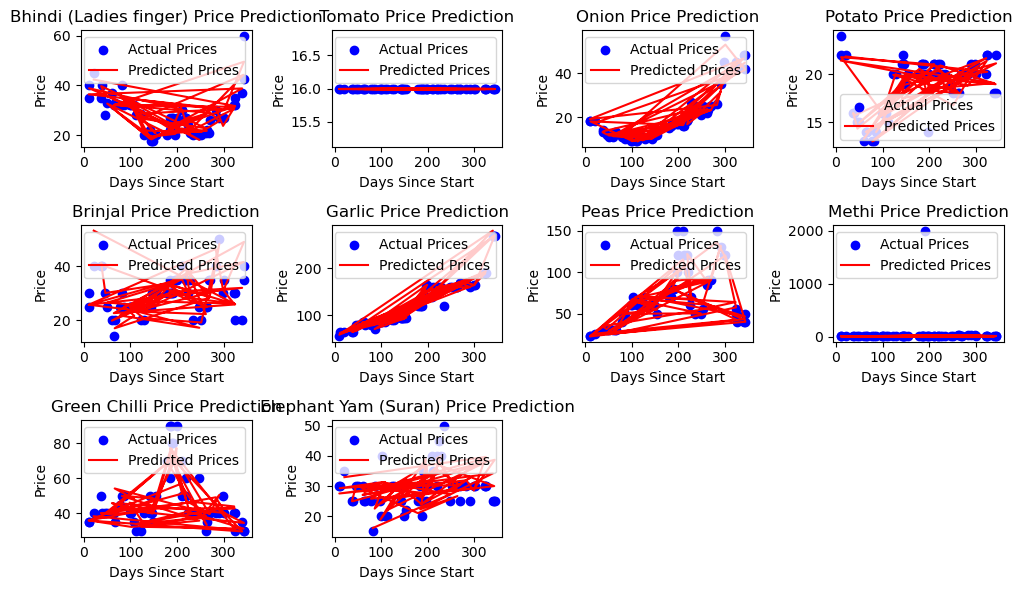

In [38]:
# Convert 'Price Dates' column to datetime with the correct format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Extract 'days_since_start' as a feature
df['days_since_start'] = (df['Price Dates'] - df['Price Dates'].min()).dt.days

# Select the relevant features for the model (vegetable prices)
X = df[['days_since_start']]
y = df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot the predicted vs actual prices
plt.figure(figsize=(10, 6))

# Plot for each vegetable
for i, column in enumerate(y.columns):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test, y_test[column], color='blue', label='Actual Prices')
    plt.plot(X_test, y_pred[:, i], color='red', label='Predicted Prices')
    plt.title(f'{column} Price Prediction')
    plt.xlabel('Days Since Start')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


**Mean Squared Error (MSE)** : 6801.413686682363: This metric measures the average squared difference between the actual and predicted prices. A lower MSE indicates better model performance.

**R-squared (R2)**: 0.6831445320600873: This metric represents the proportion of variance in the actual prices explained by the model. An R2 value closer to 1 signifies a better fit.
Model Performance and Use:

The model appears to have moderate predictive accuracy, as indicated by the R-squared value of 0.6831. This suggests that the model can explain around 68% of the variability in vegetable prices.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

### ARIMA Model

The **ARIMA(1,1,1)** model was fitted to the tomato price dataset with 366 observations spanning 2023. The results and forecast indicate the following:

1. **Model Performance Metrics**:
   - **Log Likelihood**: -11950.248, with an associated **AIC** of 23906.497 and **BIC** of 23918.196. These values indicate the goodness of fit, with lower values generally preferred when comparing models.
   - **Residual Diagnostics**:
     - The **Ljung-Box Test (L1)** shows no significant autocorrelation in the residuals (p-value = 1.00).
     - However, the model shows extreme heteroskedasticity (**H = 0.00**, p < 0.05), significant skewness (-19.03), and very high kurtosis (363), suggesting non-normal residuals.
     - The **Jarque-Bera Test** (p < 0.05) confirms the non-normal distribution of residuals.

2. **Coefficient Estimates**:
   - The ARIMA coefficients for `ar.L1` and `ma.L1` are extremely small (4.472e-07) with negligible standard errors, suggesting a numerical artifact or overfitting.
   - The error variance (`sigma²`) is also exceptionally small (0.0002), indicating a very tight model fit that might not generalize well.

3. **Forecast**:
   - The forecast for the next 10 days predicts a constant price of **16.0**, suggesting the model may lack the ability to capture dynamic trends or variability in the data.

#### Linear Regression:
- **MSE**: 0.000296
- **R²**: 0.0 (indicating the model explains none of the variability in the data)

The Linear Regression model underperformed, as it could not capture any relationships between the predictors and the target variable. Despite a low MSE, the R² value of 0.0 suggests the model is ineffective for this dataset.

#### Random Forest:
- **MSE**: 6801.41
- **R²**: 0.683

The Random Forest model achieved the highest R² (68.3%), indicating it explained a significant portion of the variance in the data. However, its MSE is much higher than that of ARIMA and Linear Regression, possibly due to its sensitivity to noise or the presence of extreme values in the data.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


Based on the results,**Random Forest Regressor** is the best model for predicting vegetable prices. It has the highest R² (0.68) and better captures the variability in the data compared to Linear Regression and ARIMA.

Random Forest is a more flexible model that is not bound by assumptions like linearity (as in Linear Regression) or time-series constraints (as in ARIMA).

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---



**Key Findings:**

* Vegetable prices exhibit significant variability, with some showing seasonal patterns.
* Certain vegetables have positive price correlations (e.g., garlic and onion).
* Random Forest emerged as the best-performing model for price prediction.

**Insights:**

* Understanding price trends and correlations can inform pricing, inventory, and purchasing strategies.
* Seasonal patterns can optimize supply chain and pricing decisions.

**Limitations:**

* Data quality and external factors can influence model accuracy.
* Overly complex models might overfit the data.

**Future Directions:**

* Improve data quality and incorporate additional relevant features.
* Explore advanced time series techniques and machine learning algorithms.
* Implement real-time monitoring and scenario analysis.

By addressing these limitations and exploring future directions, we can enhance the accuracy and reliability of vegetable price prediction models.

1. **ARIMA**:
   - While ARIMA offers a low MSE and consistent predictions, its inability to capture variability or trends makes it unsuitable for dynamic forecasting. The non-normal residuals and numerical instability indicate potential overfitting.

2. **Linear Regression**:
   - Linear Regression fails to capture the underlying patterns in the data, as evidenced by an R² of 0.0. This model is not a viable choice for this dataset.

3. **Random Forest**:
   - Random Forest provides the best trade-off between variance explained and flexibility in capturing non-linear relationships. However, its higher MSE warrants further investigation and possible tuning to address noise.

**Recommendation**: Focus on refining the Random Forest model through hyperparameter tuning and additional feature engineering. The ARIMA model could also be revisited with adjusted parameters or seasonal components to improve trend-capturing capabilities.

---

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.
Github
Keggle


## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.


## Trello and Github link

https://github.com/AkhonaNzama01/Vegetable-Price-Trends.git

https://trello.com/invite/b/66ed5107c2fac978ad9d6c11/ATTIdbc18aaf19ce083c2e358aa239f0963841768682/vegetable-price-trends-project-board